# Imports & functions

In [2]:
import numpy as np
import scipy.linalg
import scipy.io
from scipy import signal
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from blend_modes import blend_modes as bm

def normalizeMatrix(m):
    norm = ((m - np.min(m))/(np.max(m)-np.min(m)))
    return np.round(norm*255)+1

def rgb2gray(rgb):
    gray = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return gray

def gauss2D(shape=(170,170),sigma=3):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

cmapGray = plt.get_cmap('gray')

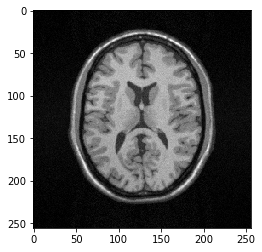

In [3]:
mat = scipy.io.loadmat('../../dane/recon_T1_synthetic_multiple_sclerosis_lesions_1mm_L16_r2.mat')
img = mat['SENSE_Tikhonov']

plt.imshow(img, cmap='gray')
plt.show()

# Load image and gaussian filtering

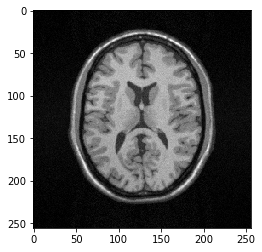

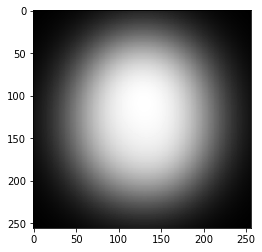

In [4]:
# np.set_printoptions(threshold=np.nan)
#img = mpimg.imread('img/1.jpg')  
gray = img

plt.imshow(gray, cmap = 'gray')
plt.show()

sizex = gray.shape[0]
sizey = gray.shape[1]
sigmaValue = np.int(np.floor((2 *sizex)/3))

blurred = signal.fftconvolve(gray, gauss2D((sigmaValue,sigmaValue),30), mode='same')
#blurred = gaussian_filter(gray, sigma=sigmaValue)
plt.imshow(blurred, cmap = cmapGray)
plt.show()

# 15 random points from the picture

In [5]:
# 15 losowych punktów z obrazu
coordx = np.int64(np.ceil(np.random.random((1, 15)) * (sizex-1)))
coordy = np.int64(np.ceil(np.random.random((1, 15)) * (sizey-1)))
values = blurred[coordx, coordy]

data = np.vstack([coordx, coordy, values]).T
print(data)

[[ 174.           63.           67.70214263]
 [ 201.           30.           16.91710934]
 [ 249.            4.            1.66516746]
 [ 162.          243.           16.9136623 ]
 [  21.          143.           44.68914862]
 [  40.           52.           26.43594175]
 [ 193.          208.           37.02488053]
 [ 111.          109.          128.73872048]
 [  25.           56.           18.90803201]
 [ 145.          245.           17.62660898]
 [ 148.           41.           49.87518446]
 [ 156.           14.           18.2946532 ]
 [ 136.          218.           48.73798415]
 [  98.          105.          125.89078665]
 [ 188.           18.           13.96580905]]


# Curve fitting

[[-0.07813352 -0.04918541 -0.05564491 ..., -0.07820795 -0.03028646
  -0.01884455]
 [-0.04267515 -0.01207906 -0.11290048 ..., -0.0004978  -0.04098666
  -0.00515538]
 [-0.02182904 -0.02021821 -0.03747696 ..., -0.11161513 -0.02422187
  -0.05416561]
 ..., 
 [-0.02469293 -0.16792739 -0.0321931  ..., -0.01986285 -0.11184261
  -0.15298366]
 [-0.05346896 -0.11480742 -0.07272278 ..., -0.01252592 -0.03804425
  -0.0906935 ]
 [-0.11473922 -0.04459199 -0.03278825 ..., -0.06956397 -0.04025917
  -0.02992521]]


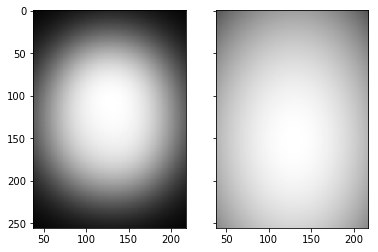

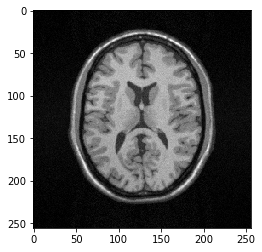

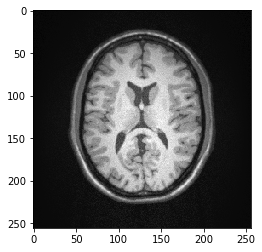

In [6]:
def func(data, a, b, c, d, e, f):
#    return a+(b*data[:,0]**c)+(d*data[:,1]**e)+(f*data[:,1]**g)+(h*data[:,1]**i)+(j*data[:,1]**k)
    return a+(b*data[:,0]**1)+(c*data[:,0]**2)+(d*data[:,1]**1)+(e*data[:,1]**2)+(f*data[:,1]**3)

# bounds=(0,3), max_nfev=2000
params, pcov = curve_fit(func, data[:,:2], data[:,2], method='lm')

data2 = np.indices((sizex,sizey)).reshape(2,-1).T
F = func(data2, *params)
F = F.reshape(sizex, sizey)
print(gray/F)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(blurred, cmap = cmapGray)
ax2.imshow(F, cmap = cmapGray)
plt.show()

mapa = gray*F
plt.imshow(gray, cmap = 'gray')
plt.show()
plt.imshow(mapa, cmap = cmapGray)
plt.show()

# Surface fitting

# Map generation

# Private notes